gray-scale histogram calculation for an image.

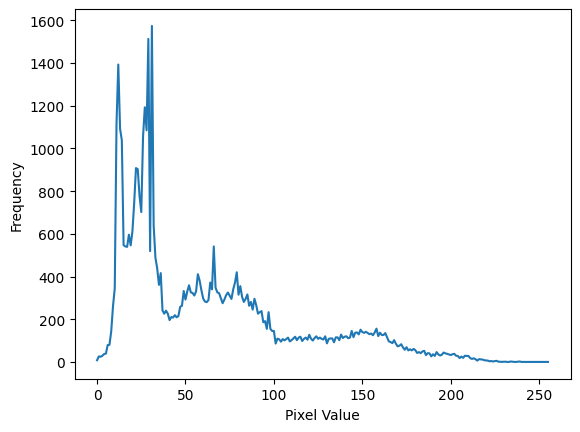

In [4]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread("../../image.jpg")
#histogram cosntants
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
histSize=256
ranges = [0,256]

histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

#show image
cv2.imshow("Original Image", img) # This wll open an independent window
# Plot the histogram
plt.plot(histogram)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
while True:
    
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cv2.destroyAllWindows()
        break
    


using a video

Camera Working = True


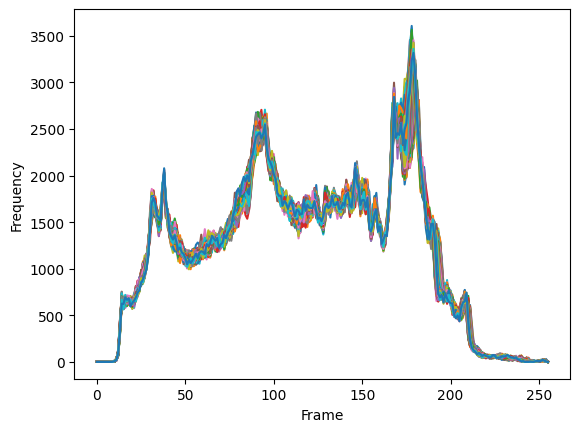

In [3]:
import cv2 
import matplotlib.pyplot as plt

camera = cv2.VideoCapture(1,cv2.CAP_DSHOW)
#camera = cv2.VideoCapture(0)

camera.set(3,200) # adjust width
camera.set(4,200) # adjust height

#wait for camera to start 

success, frame = camera.read()   
while (success==False):
    print("Camera Working =",success)
    success, frame = camera.read()   
print("Camera Working =",success)

counter = 0
#histogram cosntants
histSize=256
ranges = [0,256]
# Initialize an empty list to store the histograms for each frame


# Read the first frame
ret, frame = camera.read()
# Convert the frame to grayscale
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_frame], [0], None, [256], [0, 256])
histograms = [histogram]



while True:
    success, frame = camera.read()   
    cv2.imshow("Video", frame) # This wll open an independent window
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram for the current frame
    histogram = cv2.calcHist([gray_frame], [0], None, [256], [0, 256])

    # Append the histogram to the list
    histograms.append(histogram)
    
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cv2.destroyAllWindows()
        break
    counter += 1
# Plot the histograms
for i in range(counter):
    plt.plot(histograms[i])
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.show()